In [1]:
import numpy as np
import sys,os
import time
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from enum import Enum
import draw
import data_gen
from my_svm import my_svm,stop

%matplotlib inline
import matplotlib.pyplot as plt

seed = 371986   # set random seed

# 2.1.1

Plot the misclassification error loss , the hinge loss and the huberized hinge loss.

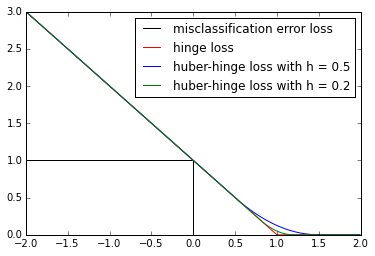

In [3]:

t = np.arange(-2, 2, 0.01)

l1 = draw.L_hinge(t)
lh1 = draw.L_huber_hinge(t , 0.5)
lh102 = draw.L_huber_hinge(t , 0.2)

plt.plot([-2, 0, 0, 2], [1, 1, 0, 0] , color="black" , label="misclassification error loss")
plt.plot(t, l1,color="red" , label="hinge loss" )
plt.plot(t, lh1,color="blue" , label="huber-hinge loss with h = 0.5" )
plt.plot(t, lh102,color="green" , label="huber-hinge loss with h = 0.2" )


plt.legend()

When h is very slow, said 0.01, the huber-hinge loss function is almost identical to the original hinge loss function

# My Gradient Descent

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


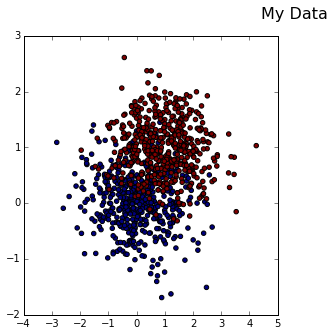

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors


fig = plt.figure(figsize=(10, 5))
fig.suptitle("My Data" , fontsize=16) 
C = np.array([[0.2, -0.53], [0.93, .03]])
X, y = data_gen.dataset_fixed_cov(500, 2, seed , C)
fig.add_subplot(121)
plt.scatter(X[:,0] , X[:,1] , c= y)

  

In [4]:
# make the input data as well-distribution

rng = np.random.RandomState(seed)
permutation = rng.permutation(len(Ｘ))

#print(X , y)
X, y = X[permutation], y[permutation]

X1 = X
y1 = y
n_features = X1.shape[1]
#print(n_features)
# split 50%-50% training sets and test sets
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(X1,y1)
#test_X1 = scaler.fit_transform(test_X1,test_y1)

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, train_size=0.5, random_state=seed)
# recentering and rescaling the train data sets and test data sets for class 0 & 1
#print(w)
#print(train_X1)
#print(train_y1)




Gradient Check : Compare difference between my gradient of the huberized hinge loss and numerical check the gradient calculation.

In [6]:
svm = my_svm(iter = 100 )    
for i in range(1,5):
    w = np.random.randn(1, 2 ).flatten()
    print("when W : " , w )
    print(svm.grad_checker(X, y , w))

when W :  [-0.09689566 -0.73809104]
Numerical result : 
[-0.67071987498446006, -1.9762490583208336]
My Gradient result : 
[-0.67071987 -1.97624906]
7.04620309109e-10
when W :  [-0.44319873 -0.22864894]
Numerical result : 
[-1.3861801927339545, -0.94948850381415539]
My Gradient result : 
[-1.38618019 -0.9494885 ]
-2.44977698796e-10
when W :  [-0.75896289 -2.52680927]
Numerical result : 
[-2.06127051908922, -5.6155621483444662]
My Gradient result : 
[-2.06127052 -5.61556215]
-3.56279881695e-10
when W :  [ 0.11470569  0.9315078 ]
Numerical result : 
[0.039526594639571755, 1.7423113126091572]
My Gradient result : 
[ 0.03952659  1.74231131]
-2.30202195727e-10


Data Training & Prediction :

In [7]:
'''
Stop criteria:
    iter = 1
    opt = 2
    perfor =3
'''    
svm = my_svm(iter = 100 )
step = [0.1*1.1**x for x in np.arange(1, 25, 5)]
result_w = []
result_obj = []
for each in step :
    w , obj , sp = svm.my_gradient_descent(train_X1,train_y1, stop = stop.iter  , step = each)
    result_w.append(w)
    result_obj.append(obj)
    

    
#print(svm.predict(test_X1,test_y1))

#svm = my_svm(iter = 1000 )    
#print(svm.my_sgd(train_X1,train_y1 , stop = stop.perfor , step = 0.11))
#print(svm.predict(test_X1,test_y1))

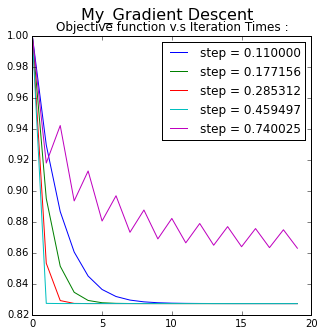

In [8]:
t = np.arange(0, 20, 1)
fig = plt.figure(figsize=(5, 5))

fig.suptitle("My_Gradient Descent" , fontsize=16) 
plt.title("Objective function v.s Iteration Times : ")
for i in range(len(step)):
    plt.plot(t, result_obj[i][0:20] , label="step = %f" %(step[i]) )

plt.legend()

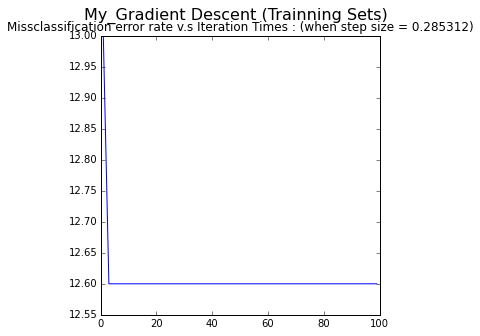

In [9]:
t = np.arange(0, 100, 1)
result_score = []
fig = plt.figure(figsize=(5, 5))
for index in range(len(result_w[3])):
    result_score.append(svm.predict(train_X1,train_y1,w=result_w[2][index]))

                        
fig.suptitle("My_Gradient Descent (Trainning Sets)" , fontsize=16) 
plt.title("Missclassification error rate v.s Iteration Times : (when step size = %f)" %step[2])
plt.plot(t, result_score[0:100] )


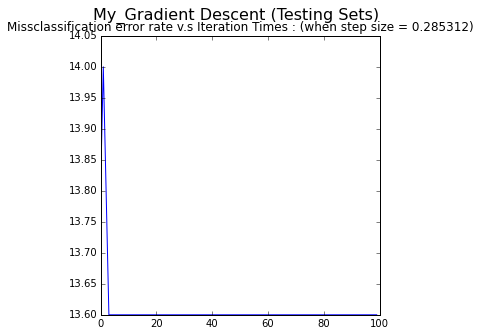

In [10]:
t = np.arange(0, 100, 1)
result_score = []
fig = plt.figure(figsize=(5, 5))
for index in range(len(result_w[3])):
    result_score.append(svm.predict(test_X1,test_y1,w=result_w[2][index]))

                        
fig.suptitle("My_Gradient Descent (Testing Sets)" , fontsize=16) 
plt.title("Missclassification error rate v.s Iteration Times : (when step size = %f)" %step[2])
plt.plot(t, result_score[0:100] )


Choose step size by backtracking line search :

Run My Gradient Descent With given step size = 0.285312
--- 0.26618504524230957 seconds ---
Predict error rate 13.600000
Run My Gradient Descent With step searched by backtracking line search 
With step size = 3.761498e-16
--- 0.49535298347473145 seconds ---
Predict error rate 14.000000


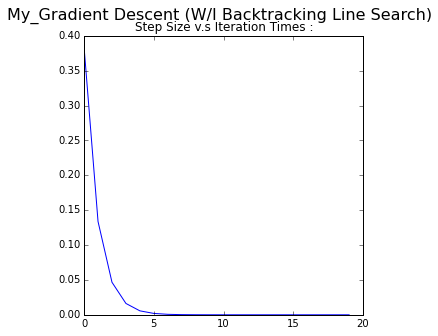

In [11]:

start_time = time.time()
w , obj , step = svm.my_gradient_descent(train_X1,train_y1, stop = stop.iter  , step = step[2])
print("Run My Gradient Descent With given step size = %f" %step[len(step)-1])
print("--- %s seconds ---" % (time.time() - start_time))

print("Predict error rate %f" %svm.predict(test_X1,test_y1,w=w[len(w)-1]))

print("Run My Gradient Descent With step searched by backtracking line search ")
start_time = time.time()
w , obj ,step= svm.my_gradient_descent(train_X1,train_y1, stop = stop.iter  )
print("With step size = %e" %step[len(step)-1])
print("--- %s seconds ---" % (time.time() - start_time))
print("Predict error rate %f" %svm.predict(test_X1,test_y1,w=w[len(w)-1]))

t = np.arange(0, 20, 1)
fig = plt.figure(figsize=(5, 5))
                        
fig.suptitle("My_Gradient Descent (W/I Backtracking Line Search)" , fontsize=16) 
plt.title("Step Size v.s Iteration Times : ")
plt.plot(t, step[0:20] )


Different Stop criteria : (Iteration V.S. Optimization V.S. Performance ) 

In [10]:
start_time = time.time()
print("Run My Gradient Descent Based on Literation time = 100")
w , obj , step = svm.my_gradient_descent(train_X1,train_y1, stop = stop.iter )
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
print("Run My Gradient Descent Based on Optimization method")
w , obj , step= svm.my_gradient_descent(train_X1,train_y1, stop = stop.opt )
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
print("Run My Gradient Descent Based on Performance method")
w , obj , step= svm.my_gradient_descent(train_X1,train_y1, stop = stop.perfor )
print("--- %s seconds ---" % (time.time() - start_time))

Run My Gradient Descent Based on Literation time = 100
--- 0.39227795600891113 seconds ---
Run My Gradient Descent Based on Optimization method
break because stop criteria II at iteration : 5
--- 0.021015167236328125 seconds ---
Run My Gradient Descent Based on Performance method
break because stop criteria III at iteration : 2
--- 0.007005929946899414 seconds ---


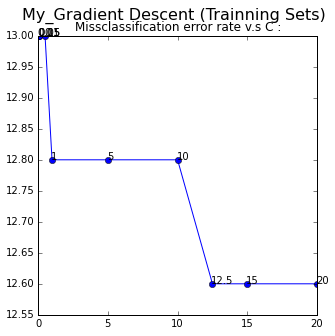

In [11]:
svm = my_svm(iter = 100 )
C = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 12.5 , 15, 20]
result_w = []
result_obj = []
for each in C :
    w , obj , sp = svm.my_gradient_descent(train_X1,train_y1, stop = stop.iter  , C = each)
    result_w.append(w[len(w)-1])
    result_obj.append(obj[len(obj)-1])
    
    

result_score = []
fig = plt.figure(figsize=(5, 5))
for index in range(len(C)):
       result_score.append(svm.predict(train_X1,train_y1,w=result_w[index]))

                        
fig.suptitle("My_Gradient Descent (Trainning Sets)" , fontsize=16) 
plt.title("Missclassification error rate v.s C :" )
plt.plot(C, result_score , marker = 'o')

for i, txt in enumerate(C):
    plt.annotate(txt, (C[i],result_score[i]))


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

print("Run Scikit Learn Based on Literation time = 100")
svc = svm.SVC(kernel='linear', C=1 , max_iter = 100).fit(train_X1, train_y1)
print("--- %s seconds ---" % (time.time() - start_time))
print(svc.score(train_X1, train_y1)*100 )

svm = my_svm(iter = 100 )
print("Run My Gradient Descent Based on Literation time = 100")
w , obj , sp = svm.my_gradient_descent(train_X1,train_y1, stop = stop.iter  , step = each)
print("--- %s seconds ---" % (time.time() - start_time))
print(100-svm.predict(train_X1,train_y1))

Run Scikit Learn Based on Literation time = 100
--- 62.951467990875244 seconds ---
86.6
Run My Gradient Descent Based on Literation time = 100
--- 63.23268508911133 seconds ---
87.4


C:\Users\howfungirl\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


# Stochasti Gradient Descent

[1, 2, 5, 10, 15, 20, 50]
[0.11000000000000001, 0.16105100000000006, 0.23579476910000019, 0.34522712143931039, 0.50544702849929457, 0.74002499442581726]
Min Error rate is :13.600000  -------   When t0 = 2.000000  and step0 = 0.110000


C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


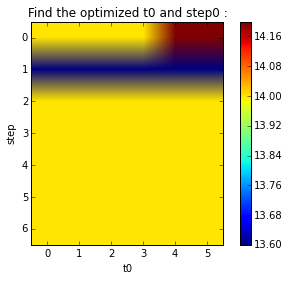

In [5]:
import sys,os
t0 = [1, 2, 5, 10,  15, 20 , 50 ]
step = [0.1*1.1**x for x in np.arange(1, 24, 4)]
print(t0)
print(step)
svm = my_svm(iter = 100 )
group = [[] for n in range(len(t0))]
min_error = sys.maxsize
for i in range(len(t0)):
    for j in range(len(step)):
        w , obj , sp = svm.my_sgd(train_X1,train_y1, seed = seed , stop = stop.perfor , step = step[j], t0 = t0[i]  )

        error = svm.predict(test_X1,test_y1,w=w[len(w)-1])
        if(min_error > error):
            min_error = error
            min_t0 = t0[i]
            min_step = step[j]
        group[i].insert(j , error )

print("Min Error rate is :%f  -------   When t0 = %f  and step0 = %f" %(min_error, min_t0 , min_step) )
plt.title('Find the optimized t0 and step0 :')
plt.xlabel('t0')
plt.ylabel('step')
plt.imshow(group)
plt.colorbar(orientation='vertical')
plt.show()

C:\Users\howfungirl\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


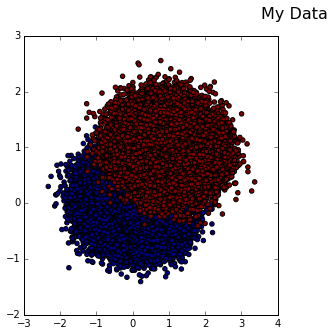

In [6]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle("My Data" , fontsize=16) 
C = np.array([[0.1, -0.33], [0.53, .03]])
XL, yL = data_gen.dataset_fixed_cov(10**5, 2, seed , C)
fig.add_subplot(121)
plt.scatter(XL[:,0] , XL[:,1] , c= yL)


In [8]:
# make the input data as well-distribution

rng = np.random.RandomState(seed)
permutation = rng.permutation(len(ＸL))

#print(X , y)
XL, yL = XL[permutation], yL[permutation]

XL1 = XL
yL1 = yL
n_features = XL1.shape[1]
#print(n_features)
# split 50%-50% training sets and test sets
scaler = preprocessing.StandardScaler()
XL1 = scaler.fit_transform(XL1,yL1)
#test_X1 = scaler.fit_transform(test_X1,test_y1)

train_XL1, test_XL1, train_yL1, test_yL1 = train_test_split(XL1, yL1, train_size=0.5, random_state=seed)
# recentering and rescaling the train data sets and test data sets for class 0 & 1
#print(w)
#print(train_X1)
#print(train_y1)


In [9]:
svm = my_svm(iter = 1 )
start_time = time.time()
print("Run My Gradient Descent Based on Performance method ")
w , obj , step= svm.my_gradient_descent(train_X1,train_y1, stop = stop.perfor )
print(svm.predict(train_X1,train_y1))
print("--- %s seconds ---" % (time.time() - start_time))

svm = my_svm(iter = len(train_X1) )
start_time = time.time()
print("Run My Stochastic Gradient Descent for one epoch")
w , obj , sp = svm.my_sgd(train_X1,train_y1, seed = seed , stop = stop.iter , step = 0.11, t0 = 2  )
print(svm.predict(train_X1,train_y1))
print("Cost %s seconds when ran on epoch of SGD---" % (time.time() - start_time))


Run My Gradient Descent Based on Performance method 
13.0
--- 0.015011072158813477 seconds ---
Run My Stochastic Gradient Descent for one epoch
12.6
Cost 0.6794791221618652 seconds when ran on epoch of SGD---


When data number with 500, one epoch of SGD running time will be longer than GD

In [11]:
svm = my_svm(iter = 100 )
start_time = time.time()
print("Run My Gradient Descent Based on Performance method ")
w , obj , step= svm.my_gradient_descent(train_XL1,train_yL1, stop = stop.perfor )
print(svm.predict(train_XL1,train_yL1))
print("--- %s seconds ---" % (time.time() - start_time))


svm = my_svm(iter = 100 )
start_time = time.time()
print("Run My Stochastic Gradient Descent Based on Performance method")
w , obj , sp = svm.my_sgd(train_XL1,train_yL1, seed = seed , stop = stop.perfor , step = 0.11, t0 = 2  )
print(svm.predict(train_XL1,train_yL1))
print("--- %s seconds ---" % (time.time() - start_time))

Run My Gradient Descent Based on Performance method 
3.661
--- 143.77845191955566 seconds ---
Run My Stochastic Gradient Descent Based on Performance method
4.649
--- 49.63735818862915 seconds ---


In [2]:
import ruleOfThumb

nums = [100 , 1000 , 10**4   ]
dims = [2,  6]
Cs = [1 ,15]
for num in nums:
    for dim in dims:
        for C in Cs:
            ruleOfThumb.ruleOfThumb(n = num , dim = dim , C = C , seed = 371986 )

---Cost 0.18613100051879883 seconds for GD ---
---Cost 0.05403900146484375 seconds for SGD ---
Use SGD to run the data number = 100.000000 and dimention = 2 , and C = 1 , with error rate = 14.000000
---Cost 0.23416709899902344 seconds for GD ---
---Cost 0.06304383277893066 seconds for SGD ---
Use SGD to run the data number = 100.000000 and dimention = 2 , and C = 15 , with error rate = 14.000000
---Cost 0.15210700035095215 seconds for GD ---
---Cost 0.05103707313537598 seconds for SGD ---
Use GD to run the data number = 100.000000 and dimention = 6 , and C = 1 , with error rate = 25.000000 
---Cost 0.19613909721374512 seconds for GD ---
---Cost 0.053034067153930664 seconds for SGD ---
Use GD to run the data number = 100.000000 and dimention = 6 , and C = 15 , with error rate = 25.000000 
---Cost 1.372972011566162 seconds for GD ---
---Cost 0.4433140754699707 seconds for SGD ---
Use GD to run the data number = 1000.000000 and dimention = 2 , and C = 1 , with error rate = 16.400000 
---C